# Supermart Grocery Sales - Retail Analytics Project
### Author: Kiran Sumit Dalmiya¶¶

## Project Overview
This project analyzes a comprehensive grocery retail dataset from Tamil Nadu, India. 

It demonstrates all critical data science workflow steps: 
- data loading,
- cleaning,
- feature engineering,
- exploratory analysis,
- and advanced visualization,
- ending with predictive modeling for sales.

## Step 1: Import Libraries

In [145]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Improve visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.1)


## Step 2: Load and Preview Dataset

Load the Supermart Grocery Sales dataset and preview its structure to understand what each column represents.


In [146]:
# Load the CSV

# Load the dataset (update the path if needed)
File_Path = r"C:\ML and AI\Unified Mentor Pvt. Ltd\Assignment 2 Supermart Grocery Sales\Supermart Grocery Sales - Retail Analytics Dataset.csv"
df = pd.read_csv(File_Path)

# Display the first few rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


**Key columns in the dataset**:

- `Order ID`: Unique identifier for each order
- `Customer Name`: Customer placing the order
- `Category`: Broad product category
- `Sub Category`: Specific product type
- `City`: City where order was placed
- `Order Date`: Date of order
- `Region`: Which part of Tamil Nadu
- `Sales`: Sales amount
- `Discount`: Discount given
- `Profit`: Profit from the order
- `State`: Always Tamil Nadu

Additional columns may involve extracted features for time series analysis and modeling.


# Step 3: Data Cleaning and preprocessing


In [147]:
df.shape


(9994, 11)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [149]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [150]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


#### There are no missing values in the dataset

In [151]:
# check for duplicates values

print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


#### There are no duplicate values in the dataset

In [152]:
# Convert Order_Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Order Date'])


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4042 non-null   object        
 1   Customer Name  4042 non-null   object        
 2   Category       4042 non-null   object        
 3   Sub Category   4042 non-null   object        
 4   City           4042 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         4042 non-null   object        
 7   Sales          4042 non-null   int64         
 8   Discount       4042 non-null   float64       
 9   Profit         4042 non-null   float64       
 10  State          4042 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 378.9+ KB


## Step 4: Feature Engineering

Extract useful date parts for trend analysis (day, month, year).

In [154]:
# Extract day, month, and year from 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [108]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


## Step 5: Exploratory Data Analysis

Analyze the data for trends in sales and profits by category, region, time, and more. 

Visualizations provide rapid insight into business performance drivers.


C:\Users\dalmi\AppData\Local\Temp\ipykernel_65728\1255686423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


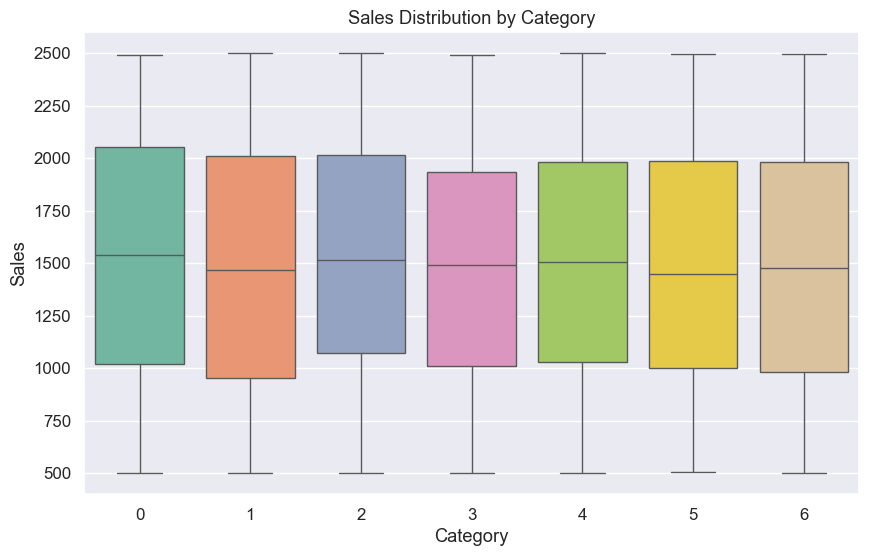

In [135]:
# Sales by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()


C:\Users\dalmi\AppData\Local\Temp\ipykernel_65728\710745324.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='Set1')
C:\Users\dalmi\AppData\Local\Temp\ipykernel_65728\710745324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='Set1')


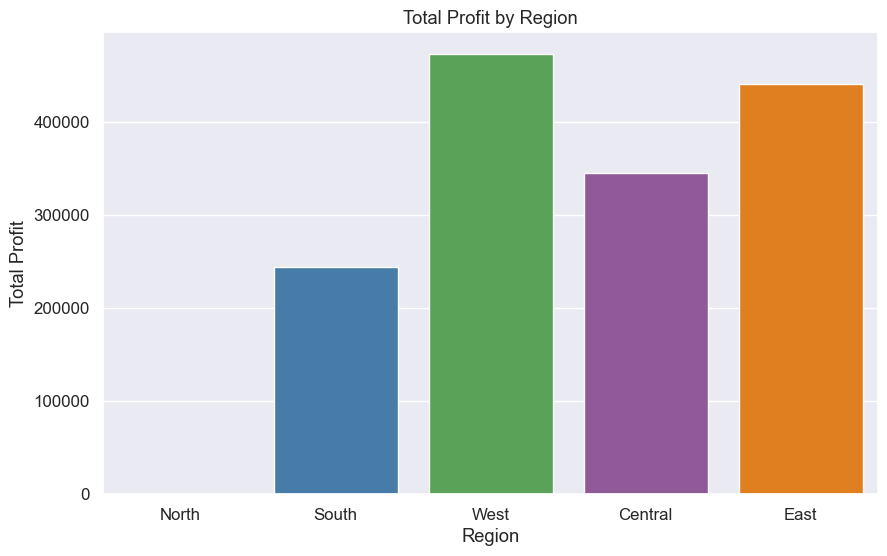

In [110]:
# Profit by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='Set1')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.show()


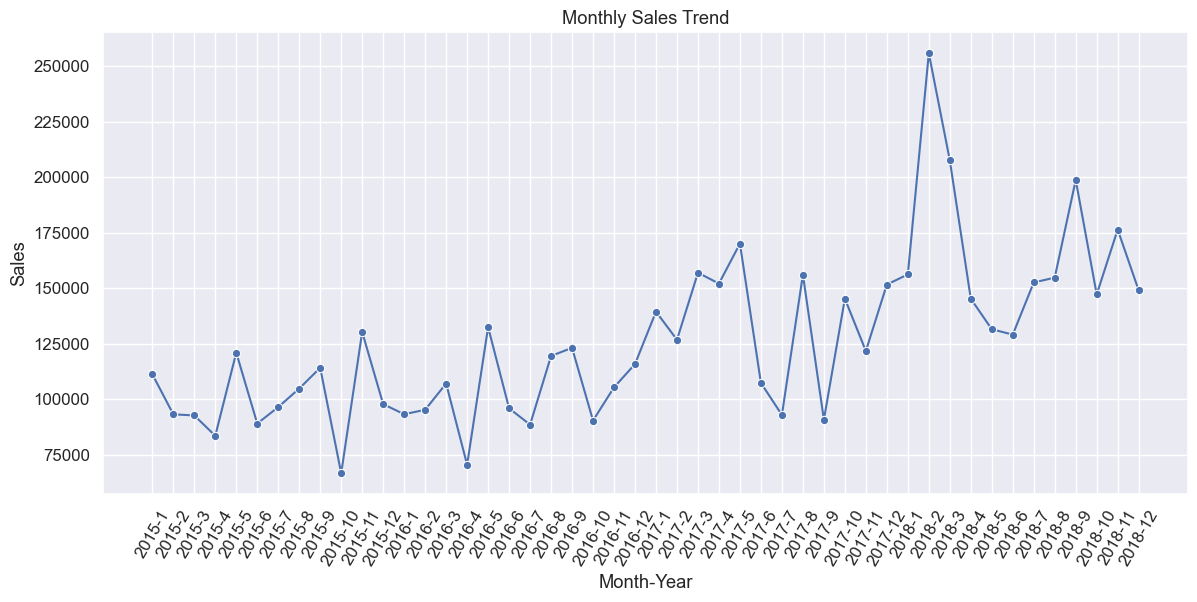

In [111]:
# Monthly Sales Trend
monthly_sales = df.groupby(['Order Year','Order Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str)
plt.figure(figsize=(14,6))
sns.lineplot(x='Month_Year', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=60)
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month-Year')
plt.show()


C:\Users\dalmi\AppData\Local\Temp\ipykernel_65728\3994282317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


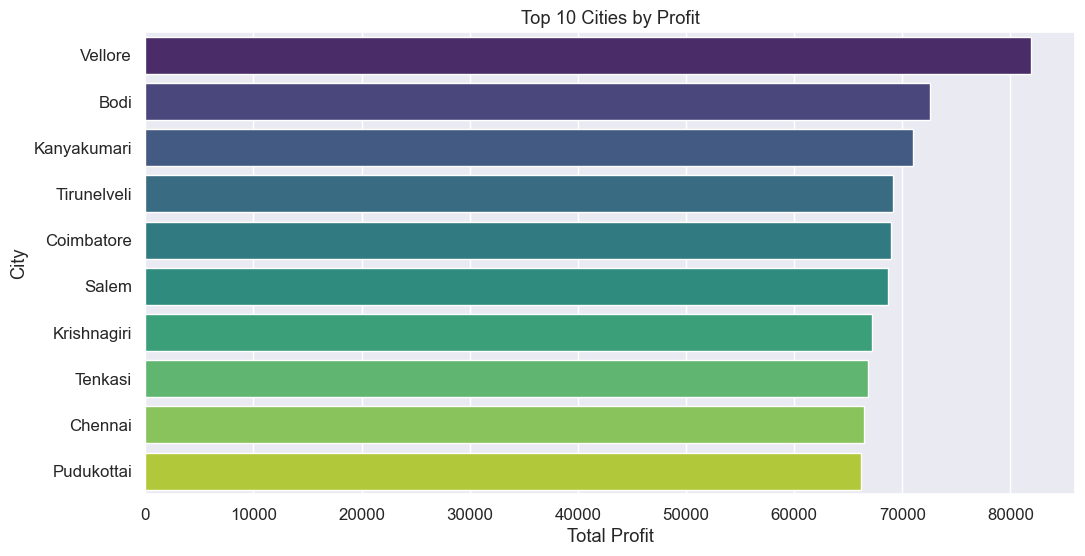

In [112]:
# Most Profitable Cities (Top 10)
top_cities = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Profit')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.show()


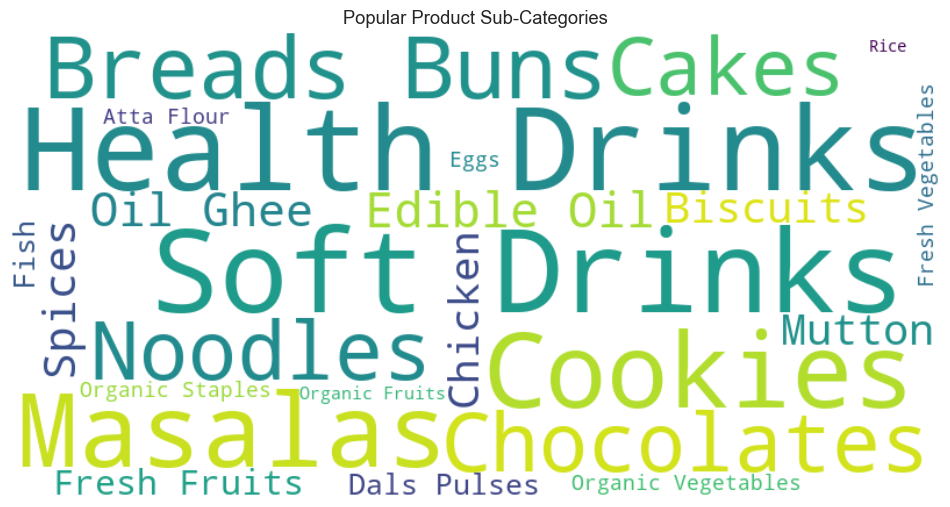

In [113]:
# Product Popularity Word Cloud
product_words = ' '.join(df['Sub Category'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_words)
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Product Sub-Categories')
plt.show()


## Step 6: Correlation and Insights

Assess the correlations between discount, sales, and profit to inform business strategy.


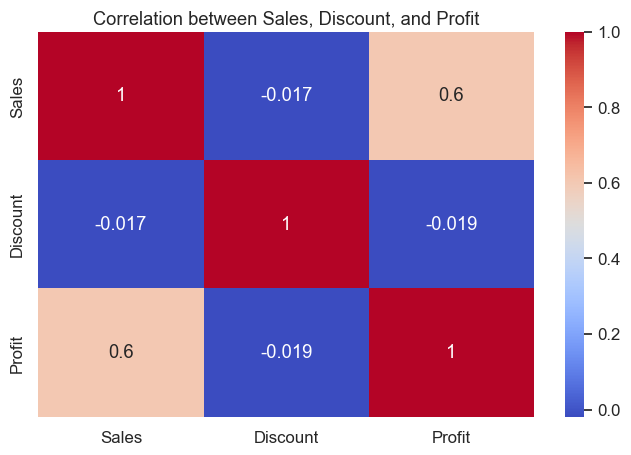

In [114]:
# Correlation Heatmap
correlations = df[['Sales','Discount','Profit']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales, Discount, and Profit')
plt.show()


## Step 7: Predictive Modeling

We'll predict sales using features like Category, Sub Category, Region, City, Month, Discount, and Profit. 

This will demonstrate basic regression modeling for business forecasting.


In [115]:
# Label Encoding categorical features
for col in ['Category','Sub Category','Region','City']:
    df[col] = LabelEncoder().fit_transform(df[col])



In [116]:
# Prepare features and target
features = df[['Category','Sub Category','Region','City','Order Month','Discount','Profit']]
target = df['Sales']



In [117]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)




In [118]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:


# Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Step 8: Model Evaluation

Assess the model's performance using RMSE and R-squared and visualize actual vs. predicted values.


Mean Squared Error: 210968.94
R-squared: 0.37


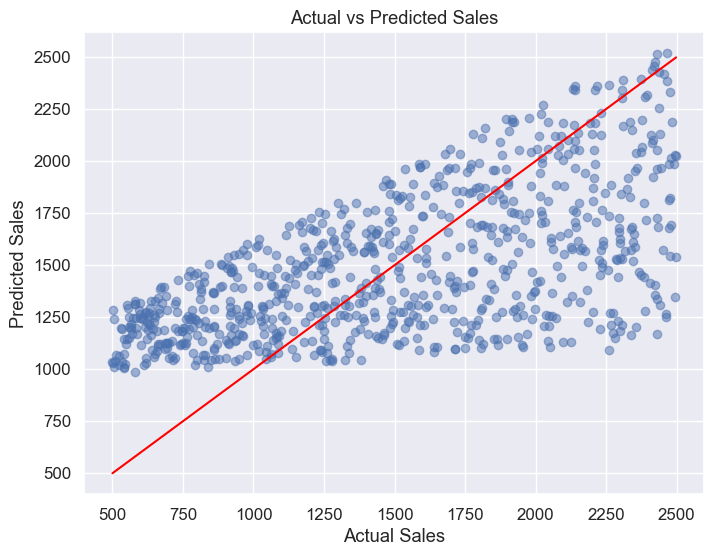

In [120]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Results scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


### Understanding Results
- R-squared (0.37): About 37% of the variability in sales is accounted for by the features used. For retail data,
- this is a modest but not strong result, showing significant unexplained variation.​

- Mean Squared Error (210,968.94): On a scale set by your sales values, this is relatively large. MSE is sensitive to outliers and model underfitting.

#### Why Might Accuracy Be Limited?
- Retail sales data often includes high variance, with spikes, discounts, promotions, and seasonality.

- Important predictive features (day of week, holiday, external events, or product-specific price trends) may be missing.

- Linear regression may not capture complex relationships; tree-based models or ensemble methods may work better.​

#### How to Improve the Model
- Feature Engineering: Add more features such as:

- Day of week, whether the day is a holiday, lagged sales (sales from previous orders), running averages.

- Interactions (discount × category) to capture nonlinear effects.

- Model Choice: Try more advanced models:

- Decision Trees, Random Forests, Gradient Boosting (XGBoost, LightGBM)


These models can automatically capture interactions and nonlinear patterns.

- Outlier Removal: Remove extreme outliers from Sales column; these often dominate MSE.

- Log transformation: If sales values are highly skewed, take the log of sales to stabilize variance.

In [121]:
# Log-transform the target if skewed
df['Log_Sales'] = np.log1p(df['Sales'])

# Add day of week and check for holidays (requires holiday list)
df['DayOfWeek'] = df['Order Date'].dt.dayofweek





## Use tree models for prediction

In [122]:

from sklearn.ensemble import RandomForestRegressor

features = df[['Category','Sub Category','Region','City','Order Month','Discount','Profit','DayOfWeek']]
target = df['Log_Sales']


In [123]:


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)



In [124]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



In [125]:


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest MSE:', mse)
print('Random Forest R2:', r2)


Random Forest MSE: 0.12721119373499812
Random Forest R2: 0.33622667868231304


#### Interpretation
MSE (on log-sales): This error is now much smaller, because the target variable was transformed to a logarithmic scale. 
It measures squared error in the log-transformed units. 


R2: About 34% of the variance in log-sales is explained by your chosen features and Random Forest model. 
    This is comparable to, but slightly lower than, the linear model’s R2 on the raw scale, showing similar feature informativeness, 
    but improved interpretability due to log scaling.

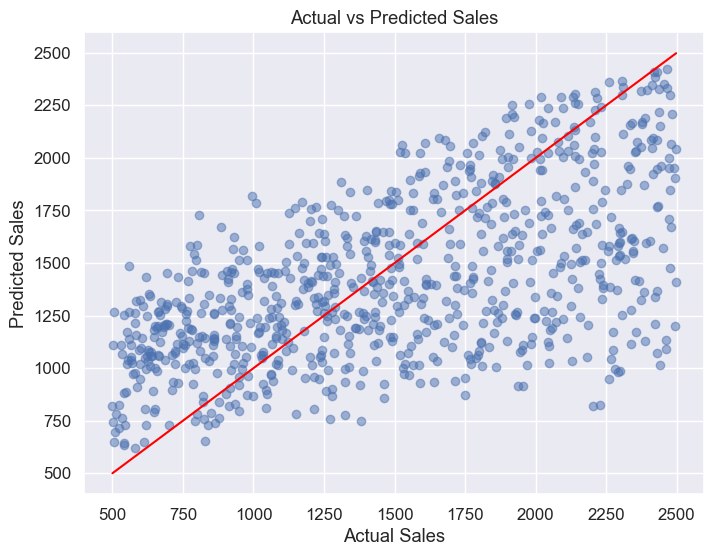

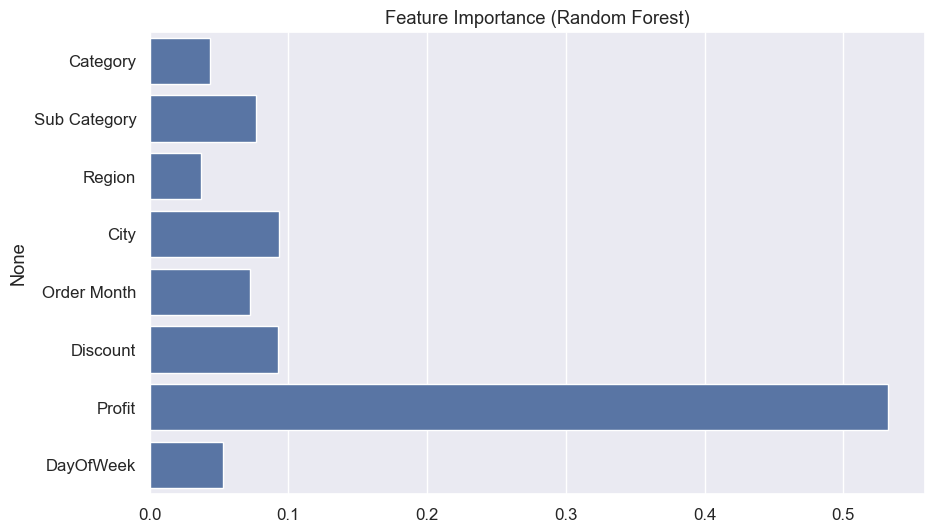

In [126]:
# Inverse log-transform for true interpretation
y_test_sales = np.expm1(y_test)
y_pred_sales = np.expm1(y_pred)

# Visualize error
plt.figure(figsize=(8,6))
plt.scatter(y_test_sales, y_pred_sales, alpha=0.5)
plt.plot([y_test_sales.min(), y_test_sales.max()],
         [y_test_sales.min(), y_test_sales.max()], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Feature importance
importances = rf.feature_importances_
feat_names = features.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [127]:
# Step: Remove Outliers from Sales Using IQR
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

In [128]:
# Define bounds for filtering
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


In [136]:
# Filter out rows with sales outside these bounds
df_no_outliers = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)].copy()

print(f'Removed {len(df) - len(df_no_outliers)} outliers from {len(df)} records.')



Removed 2977 outliers from 4042 records.


In [141]:
# Recalculate log sales target
df_no_outliers['Log_Sales'] = np.log1p(df_no_outliers['Sales'])

# Split features and target
features_no_outliers = df_no_outliers[['Category','Sub Category','Region','City','Order Month','Discount','Profit','DayOfWeek']]
target_no_outliers = df_no_outliers['Sales']


In [142]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features_no_outliers, target_no_outliers, test_size=0.20, random_state=42)



In [143]:
# Train Random Forest model again
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [144]:


# Evaluate new model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest MSE after outlier removal: {mse:.4f}')
print(f'Random Forest R2 after outlier removal: {r2:.4f}')

Random Forest MSE after outlier removal: 24093.6121
Random Forest R2 after outlier removal: 0.0507
